In [20]:
import pandas as pd
import numpy as np

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [28]:
df = pd.read_csv("Social_Network_Ads.csv", usecols=["Age", "EstimatedSalary", "Purchased"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [30]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [36]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [56]:
X = df.iloc[:,0:2]
y = df.iloc[:,2]

In [58]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [62]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [70]:
sns.set_theme()
df = sns.load_dataset("penguins")

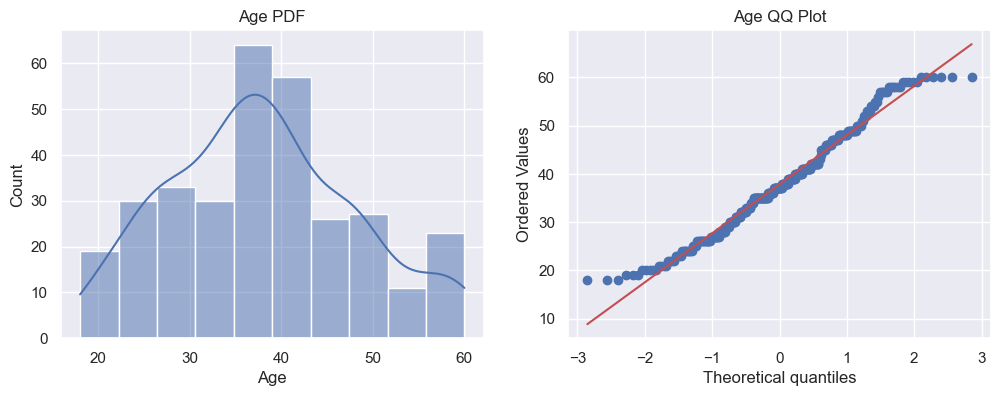

In [134]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.histplot(X_train["Age"], kde=True)
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(X_train["Age"], dist="norm", plot=plt)
plt.title("Age QQ Plot")
plt.show()

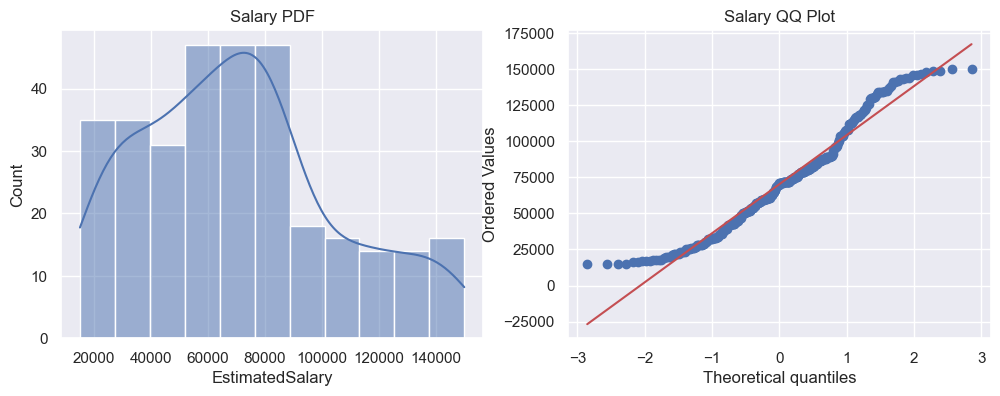

In [136]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.histplot(X_train["EstimatedSalary"], kde=True)
plt.title("Salary PDF")

plt.subplot(122)
stats.probplot(X_train["EstimatedSalary"], dist="norm", plot=plt)
plt.title("Salary QQ Plot")
plt.show()

# Without Transformation

In [112]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [130]:
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

print(f"Accuracy Logistic Regression: {accuracy_score(y_test, y_pred1)*100:.3f}%")
print(f"Accuracy Decision Tree: {accuracy_score(y_test, y_pred2)*100:.3f}%")

Accuracy Logistic Regression: 88.750%
Accuracy Decision Tree: 83.750%


# With Transformation

In [139]:
trf = FunctionTransformer(func=np.log1p)

In [141]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [143]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [145]:
clf1.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

y_pred1 = clf1.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed)

print(f"Accuracy Logistic Regression: {accuracy_score(y_test, y_pred1)*100:.3f}%")
print(f"Accuracy Decision Tree: {accuracy_score(y_test, y_pred2)*100:.3f}%")

Accuracy Logistic Regression: 85.000%
Accuracy Decision Tree: 85.000%


# Cross Validation

In [148]:
X_transformed = trf.fit_transform(X)

In [156]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

LR = np.mean(cross_val_score(clf1, X_transformed, y, scoring="accuracy", cv=10))
DT = np.mean(cross_val_score(clf2, X_transformed, y, scoring="accuracy", cv=10))

In [158]:
print(f"Accuracy Logistic Regression: {LR*100:.2f}%")
print(f"Accuracy Decision Tree: {DT*100:.2f}%")

Accuracy Logistic Regression: 79.00%
Accuracy Decision Tree: 83.75%


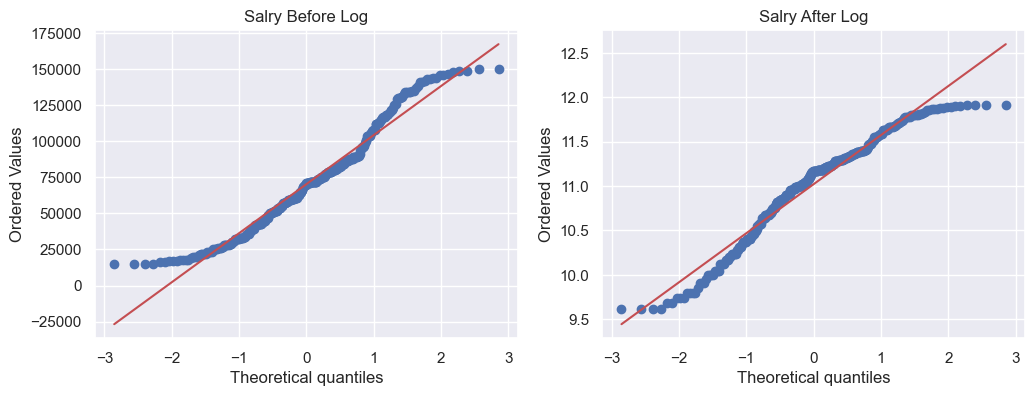

In [166]:
plt.figure(figsize=(12,4))

plt.subplot(121)
stats.probplot(X_train["EstimatedSalary"], dist="norm", plot=plt)
plt.title("Salry Before Log")

plt.subplot(122)
stats.probplot(X_train_transformed["EstimatedSalary"], dist="norm", plot=plt)
plt.title("Salry After Log")

plt.show()

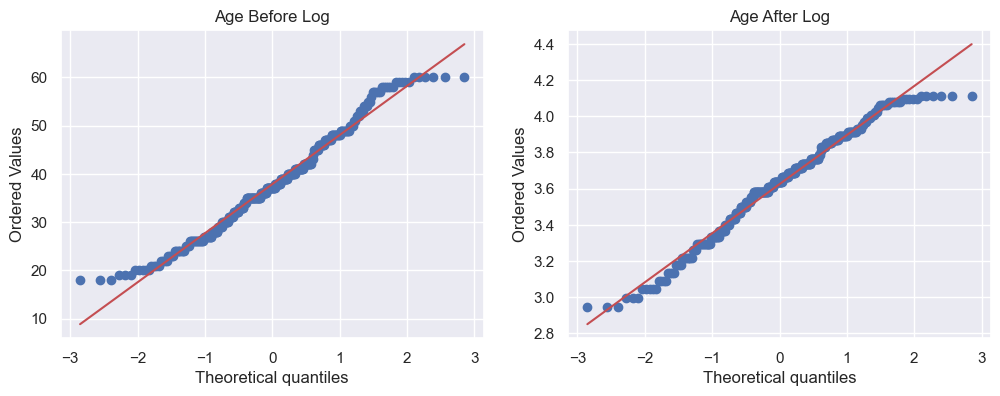

In [168]:
plt.figure(figsize=(12,4))

plt.subplot(121)
stats.probplot(X_train["Age"], dist="norm", plot=plt)
plt.title("Age Before Log")

plt.subplot(122)
stats.probplot(X_train_transformed["Age"], dist="norm", plot=plt)
plt.title("Age After Log")

plt.show()